### MNIST Classification with CNN

In [12]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets
from torchvision.transforms import ToTensor

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [4]:
train_data = datasets.MNIST(root = 'data', train = True, transform = ToTensor(), download = True)
test_data = datasets.MNIST(root = 'data', train = False, transform = ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw



In [5]:
print(train_data)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [6]:
print(test_data)

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [11]:
train_data.data.size(), train_data.targets.size()

(torch.Size([60000, 28, 28]), torch.Size([60000]))

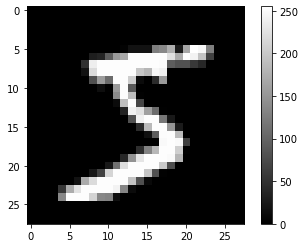

In [13]:
# Visualize the data
plt.imshow(train_data.data[0], cmap='gray')
plt.colorbar()
plt.show()

In [14]:
from torch.utils.data import DataLoader

loaders = {'train': torch.utils.data.DataLoader(train_data, batch_size=100, shuffle=True, num_workers=1),
           'test': torch.utils.data.DataLoader(test_data, batch_size=100, shuffle=True, num_workers=1),
           }
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x1889b9d8100>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x18899ca2b20>}

In [15]:
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         
            nn.Conv2d(
                in_channels=1,              
                out_channels=16,            
                kernel_size=5,              
                stride=1,                   
                padding=2,                  
            ),                              
            nn.ReLU(),                      
            nn.MaxPool2d(kernel_size=2),    
        )
        self.conv2 = nn.Sequential(         
            nn.Conv2d(16, 32, 5, 1, 2),     
            nn.ReLU(),                      
            nn.MaxPool2d(2),                
        )
        # fully connected layer, output 10 classes
        self.out = nn.Linear(32 * 7 * 7, 10)
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)       
        output = self.out(x)
        return output, x    # return x for visualization

In [16]:
cnn = CNN()
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [17]:
# Define loss function
loss_func = nn.CrossEntropyLoss()
loss_func

CrossEntropyLoss()

In [18]:
# Define a optimization functiın
from torch import optim

optimizer = optim.Adam(cnn.parameters(), lr = 0.01)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.01
    maximize: False
    weight_decay: 0
)

In [27]:
# Train the model
from torch.autograd import Variable
num_epochs = 10
def train(num_epochs, cnn, loaders):
    
    cnn.train()
        
    # Train the model
    total_step = len(loaders['train'])
        
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(loaders['train']):
            
            # gives batch data, normalize x when iterate train_loader
            b_x = Variable(images)   # batch x
            b_y = Variable(labels)   # batch y 
            output = cnn(b_x)[0]               
            loss = loss_func(output, b_y)
            
            # clear gradients for this training step   
            optimizer.zero_grad()           
            
            # backpropagation, compute gradients 
            loss.backward()    

            # apply gradients             
            optimizer.step()                
            
            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
                pass
        pass
    pass

train(num_epochs, cnn, loaders)

Epoch [1/10], Step [100/600], Loss: 0.0685
Epoch [1/10], Step [200/600], Loss: 0.0727
Epoch [1/10], Step [300/600], Loss: 0.1200
Epoch [1/10], Step [400/600], Loss: 0.0787
Epoch [1/10], Step [500/600], Loss: 0.0087
Epoch [1/10], Step [600/600], Loss: 0.0154
Epoch [2/10], Step [100/600], Loss: 0.0545
Epoch [2/10], Step [200/600], Loss: 0.0869
Epoch [2/10], Step [300/600], Loss: 0.0171
Epoch [2/10], Step [400/600], Loss: 0.1101
Epoch [2/10], Step [500/600], Loss: 0.0351
Epoch [2/10], Step [600/600], Loss: 0.0252
Epoch [3/10], Step [100/600], Loss: 0.0107
Epoch [3/10], Step [200/600], Loss: 0.0574
Epoch [3/10], Step [300/600], Loss: 0.0276
Epoch [3/10], Step [400/600], Loss: 0.0834
Epoch [3/10], Step [500/600], Loss: 0.0540
Epoch [3/10], Step [600/600], Loss: 0.0200
Epoch [4/10], Step [100/600], Loss: 0.0415
Epoch [4/10], Step [200/600], Loss: 0.0576
Epoch [4/10], Step [300/600], Loss: 0.0621
Epoch [4/10], Step [400/600], Loss: 0.0185
Epoch [4/10], Step [500/600], Loss: 0.0096
Epoch [4/10

In [28]:
# Evaluating the model
def test():
    # Test the model
    cnn.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in loaders['test']:
            test_output, last_layer = cnn(images)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
            pass

    print('Test Accuracy of the model on the 10000 test images: %.2f' % accuracy)
    pass

test()

Test Accuracy of the model on the 10000 test images: 0.99


In [29]:
# Predictions
sample = next(iter(loaders['test']))
imgs, lbls = sample

In [30]:
actual_number = lbls[:10].numpy()
actual_number

array([1, 1, 4, 3, 4, 4, 6, 1, 9, 9], dtype=int64)

In [32]:
test_output, last_layer = cnn(imgs[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(f'Prediction number: {pred_y}')
print(f'Actual number: {actual_number}')

Prediction number: [1 1 4 3 4 4 6 1 9 9]
Actual number: [1 1 4 3 4 4 6 1 9 9]


### MNIST Classification with RNN

In [18]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, SimpleRNN
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist

In [17]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [19]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 11s 1us/step


In [20]:
# Number of labels
num_labels = len(np.unique(y_train))

In [21]:
# Convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [22]:
# Resize and normalize
image_size = x_train.shape[1]
x_train = np.reshape(x_train,[-1, image_size, image_size])
x_test = np.reshape(x_test,[-1, image_size, image_size])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [23]:
# Parameters
input_shape = (image_size, image_size)
batch_size = 128
units = 256
dropout = 0.2

In [24]:
# model is RNN with 256 units, input is 28-dim vector 28 timesteps
model = Sequential()
model.add(SimpleRNN(units=units, input_shape=input_shape))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()
plot_model(model, to_file='rnn-mnist.png', show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 256)               72960     
                                                                 
 dense (Dense)               (None, 10)                2570      
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
Total params: 75,530
Trainable params: 75,530
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [25]:
# Loss function for one-hot vector
# Sgd optimizer
# Accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Training the network
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

# Show accuracy
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/20
469/469 [==============================] - 15s 28ms/step - loss: 0.6520 - accuracy: 0.8308
Epoch 2/20
469/469 [==============================] - 14s 31ms/step - loss: 0.2577 - accuracy: 0.9269
Epoch 3/20
469/469 [==============================] - 15s 31ms/step - loss: 0.1915 - accuracy: 0.9453
Epoch 4/20
469/469 [==============================] - 15s 32ms/step - loss: 0.1584 - accuracy: 0.9543
Epoch 5/20
469/469 [==============================] - 15s 33ms/step - loss: 0.1379 - accuracy: 0.9599
Epoch 6/20
469/469 [==============================] - 14s 30ms/step - loss: 0.1236 - accuracy: 0.9643
Epoch 7/20
469/469 [==============================] - 14s 29ms/step - loss: 0.1109 - accuracy: 0.9672
Epoch 8/20
469/469 [==============================] - 14s 30ms/step - loss: 0.1002 - accuracy: 0.9708
Epoch 9/20
469/469 [==============================] - 14s 30ms/step - loss: 0.0946 - accuracy: 0.9720
Epoch 10/20
469/469 [==============================] - 14s 30ms/step - loss: 0.088

### MNIST Classification with LSTM

In [39]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [28]:
# Load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [29]:
# Normalizing the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [32]:
# Initializing model
model = keras.models.Sequential()

# Adding the model layers
model.add(keras.layers.LSTM(128, input_shape=(X_train.shape[1:]), return_sequences=True))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(128))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation='softmax'))

In [33]:
# Compiling the model
model.compile( loss='sparse_categorical_crossentropy', optimizer = keras.optimizers.Adam(lr=0.001, decay=1e-6), metrics=['accuracy'] )

d:\AnacondaPy\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [34]:
# Fitting data to the model
history = model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test))

Epoch 1/3
1875/1875 [==============================] - 107s 54ms/step - loss: 0.3376 - accuracy: 0.8945 - val_loss: 0.1007 - val_accuracy: 0.9695
Epoch 2/3
1875/1875 [==============================] - 97s 52ms/step - loss: 0.1013 - accuracy: 0.9710 - val_loss: 0.0647 - val_accuracy: 0.9808
Epoch 3/3
1875/1875 [==============================] - 99s 53ms/step - loss: 0.0707 - accuracy: 0.9800 - val_loss: 0.0689 - val_accuracy: 0.9783


In [35]:
# Evaluating the test loss and accuracy
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

313/313 [==============================] - 6s 20ms/step - loss: 0.0689 - accuracy: 0.9783
Test Loss: 0.06885961443185806
Test Accuracy: 0.9782999753952026


In [36]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

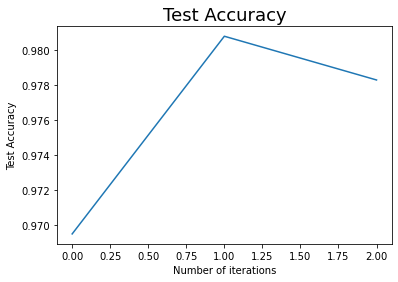

In [40]:
# Visualizing the change in the validation loss
plt.plot(val_acc) 
plt.title("Test Accuracy",size=18)
plt.xlabel("Number of iterations") 
plt.ylabel("Test Accuracy") 
plt.show() 

#### SOURCES

##### https://www.kaggle.com/code/shivanisheth2911/lstm-keras-on-mnist
##### https://medium.com/@nutanbhogendrasharma/pytorch-convolutional-neural-network-with-mnist-dataset-4e8a4265e118
##### https://notebook.community/roatienza/Deep-Learning-Experiments/keras/rnn/simple-rnn-mnist